## AA test multigroup split simple
Provides simple approach to split into 2 and more groups.  
Uses memory more efficiently than old method "process"

In [1]:
import numpy as np
import pandas as pd

from lightautoml.addons.hypex import AATest
from lightautoml.addons.hypex.utils.tutorial_data_creation import create_test_data

pd.options.display.float_format = '{:,.2f}'.format

np.random.seed(42)  # needed to create example data

### Prepare some large data

In [2]:
some_large_dataframe = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'], num_users=100_000)
some_large_dataframe

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,478.00,422.89,NaN,M,Logistics
1,1,0,0,472.50,407.22,68.00,NaN,E-commerce
2,2,0,0,485.00,426.11,44.00,F,Logistics
3,3,8,1,485.00,466.11,59.00,F,E-commerce
4,4,1,1,539.00,522.78,54.00,M,E-commerce
...,...,...,...,...,...,...,...,...
99995,99995,0,0,473.50,428.56,22.00,F,Logistics
99996,99996,0,0,497.00,421.89,65.00,M,E-commerce
99997,99997,3,1,485.00,517.56,20.00,M,Logistics
99998,99998,0,0,458.50,410.78,69.00,M,E-commerce


### Process split

Generating random divisions:   0%|          | 0/2000 [00:00<?, ?it/s]

Metrics calculations:   0%|          | 0/2000 [00:00<?, ?it/s]

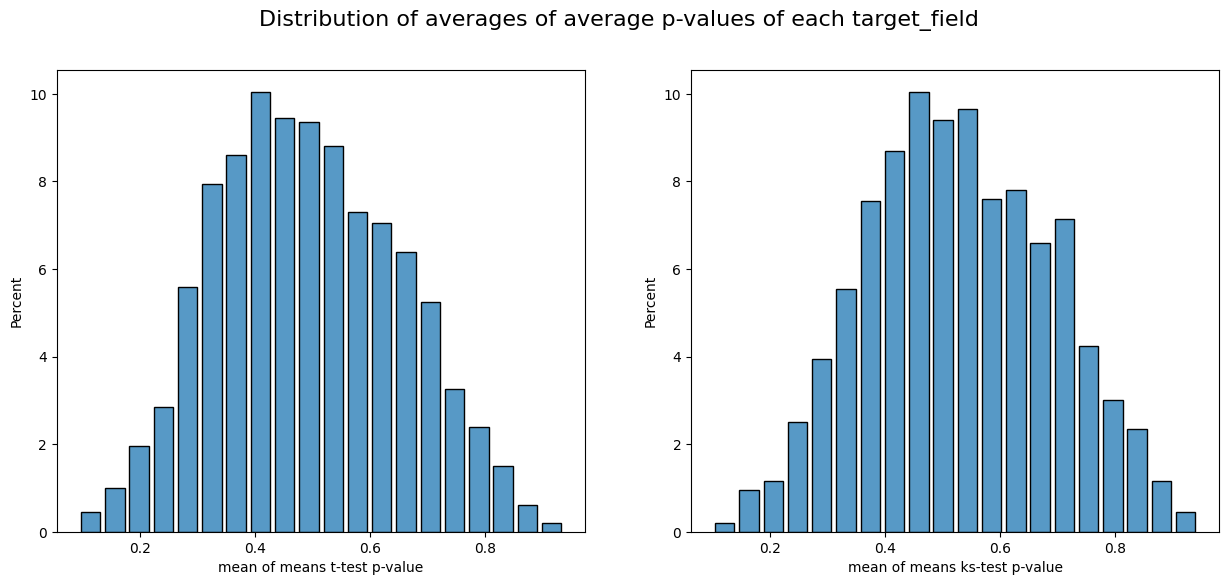

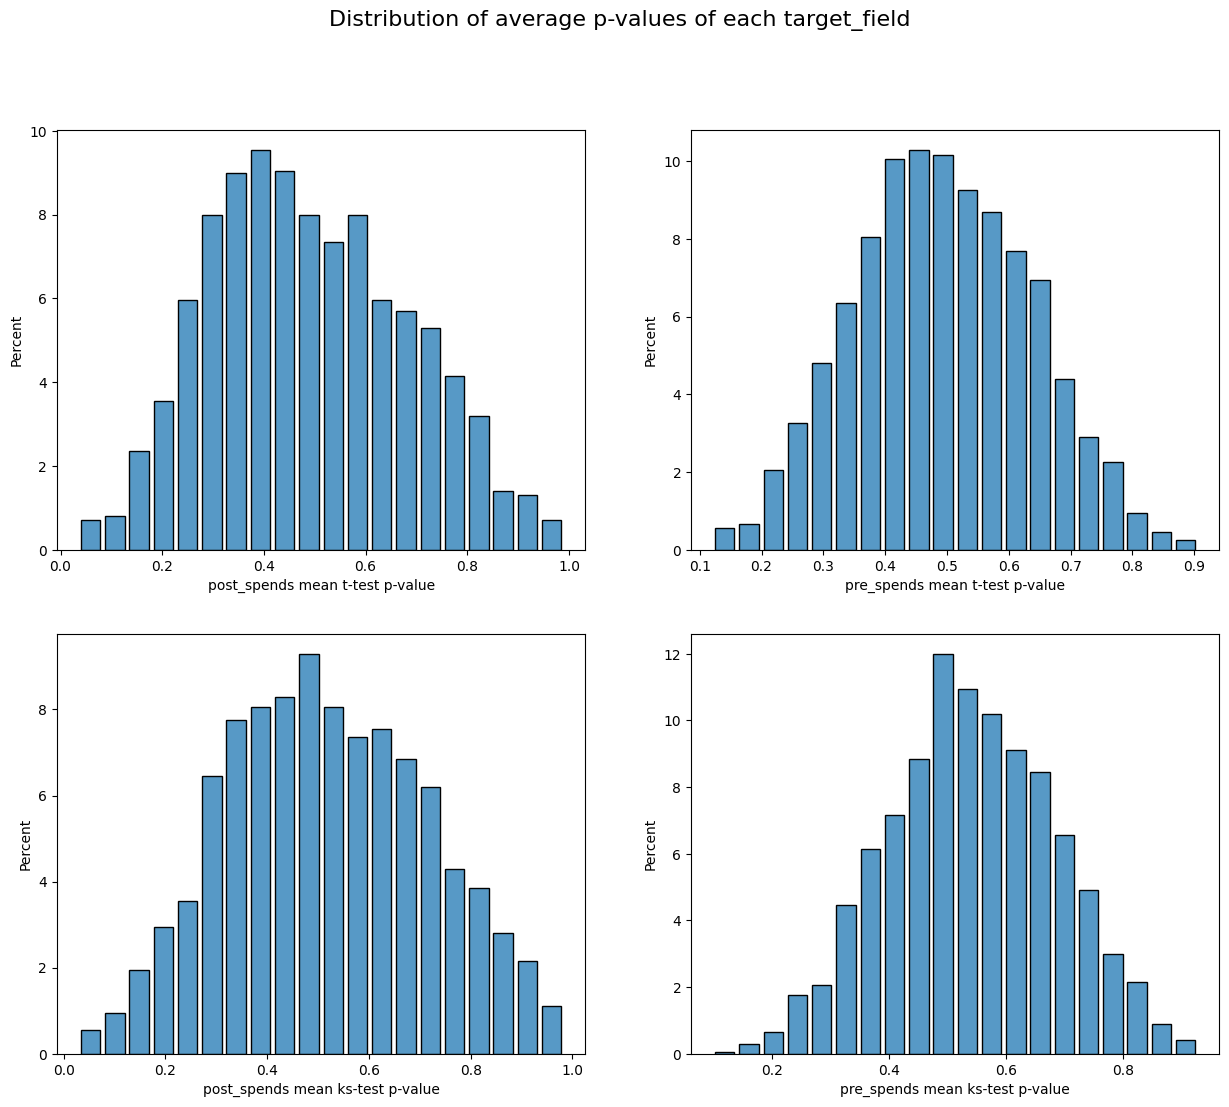

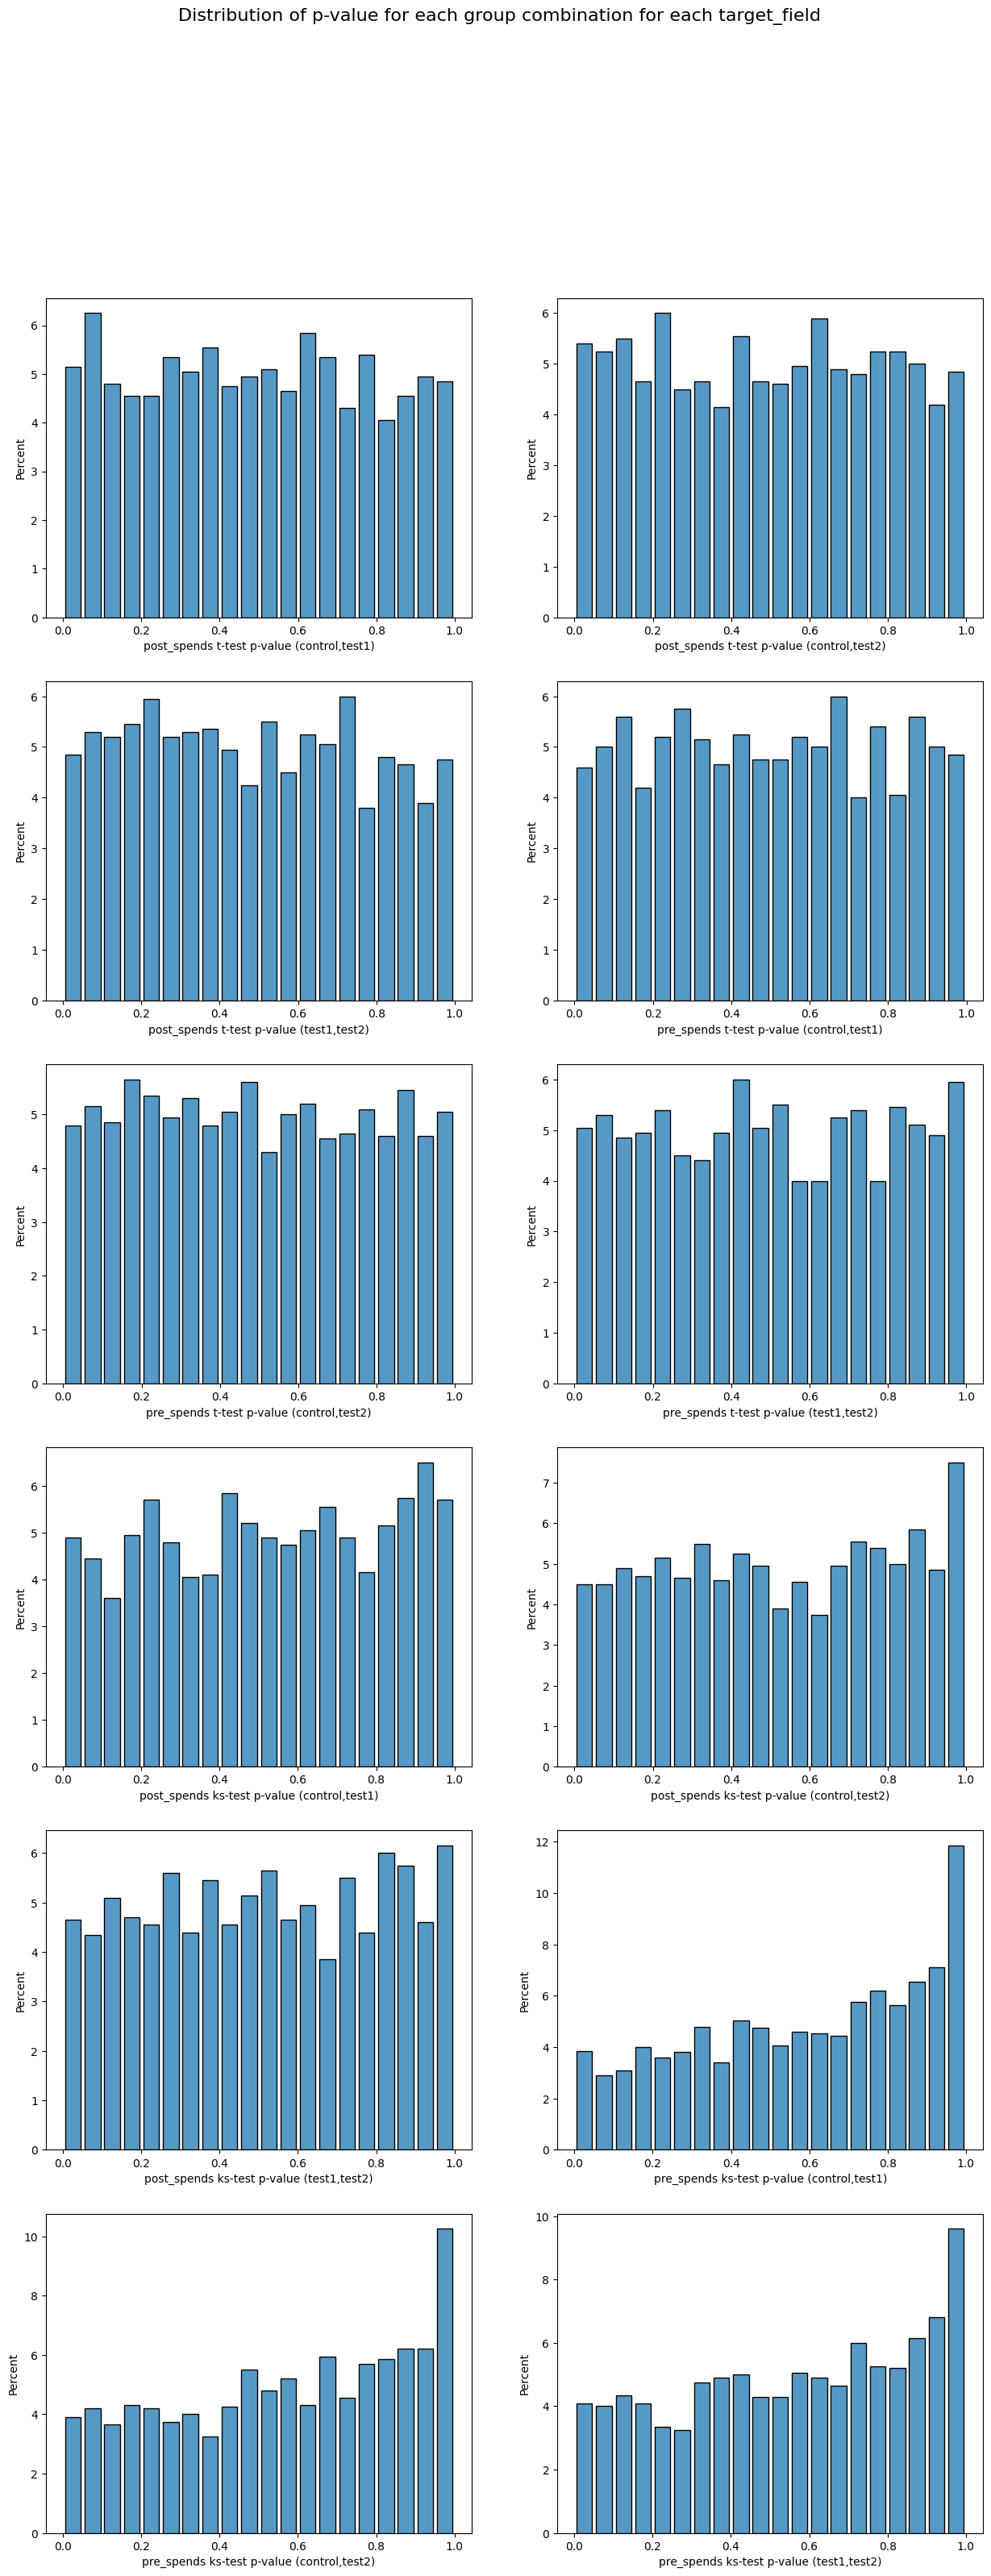

In [3]:
target = ['post_spends', 'pre_spends']
# Dict 
#  key - group name
#  value - share
#  The sum of the shares is 1
groups = {'test1': 0.3, 'test2': 0.2, 'control': 0.5 }

aa_test = AATest()
results = aa_test.process_split(df=some_large_dataframe, target_fields=target, groups=groups)

In [4]:
results.keys()

dict_keys(['best metric', 'best split', 'all metrics', 'all splits', 'best split DataFrame', 'get_resume'])

`results` is a dictionary with dataframes as values.<br>
* 'best split' - result of best separation
* 'best metric' - metrics of best split  
* 'all metrics' - metrics of all experiments (i.e. of random splits)  
* 'all splists' - results of all random splits  
* 'best split DataFrame' - pandas DataFrame with column 'group' (or defined by 'group_column_name' parameter) contains values defined as keys in 'groups' parameter  
* 'get resume' - function that plots p-values distribution of all experiments


In [5]:
results['best metric']

control post_spends mean                          451.86
test1 post_spends mean                            451.93
test2 post_spends mean                            451.90
post_spends mean delta (control - test1)           -0.06
post_spends mean delta% (control - test1)/test1    -0.01
post_spends t-test p-value (control,test1)          0.83
post_spends ks-test p-value (control,test1)         0.98
post_spends mean delta (control - test2)           -0.04
post_spends mean delta% (control - test2)/test2    -0.01
post_spends t-test p-value (control,test2)          0.91
post_spends ks-test p-value (control,test2)         1.00
post_spends mean delta (test1 - test2)              0.02
post_spends mean delta% (test1 - test2)/test2       0.01
post_spends t-test p-value (test1,test2)            0.95
post_spends ks-test p-value (test1,test2)           0.97
post_spends mean t-test p-value                     0.89
post_spends mean ks-test p-value                    0.98
post_spends t-test passed      